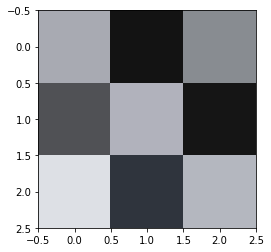

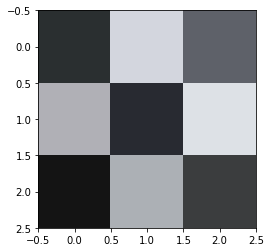

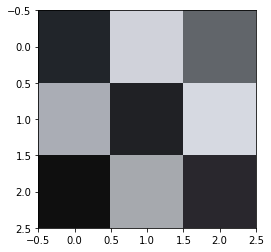

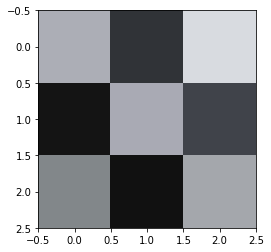

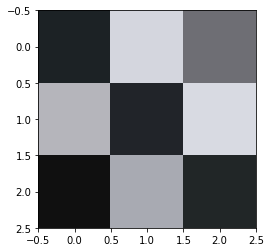

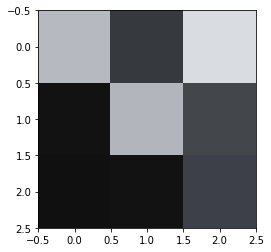

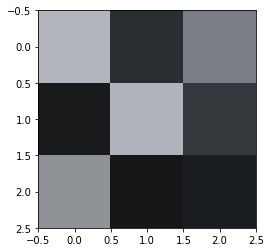

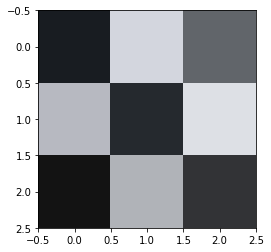

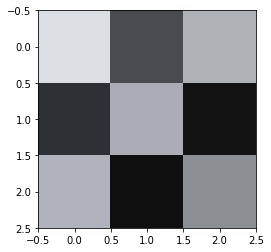

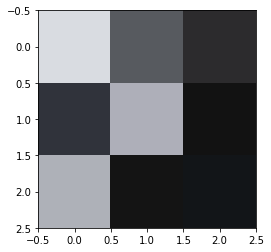

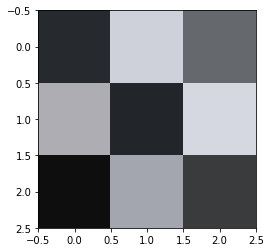

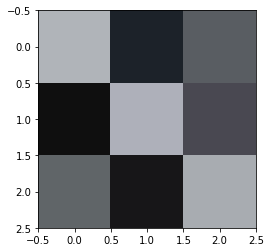

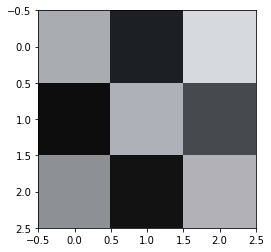

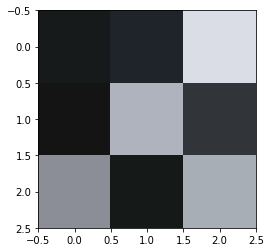

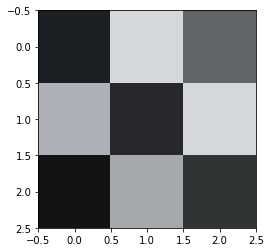

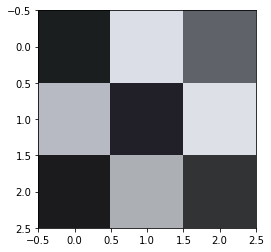

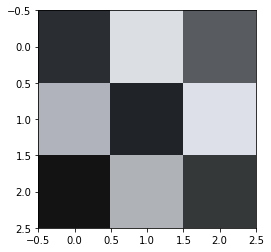

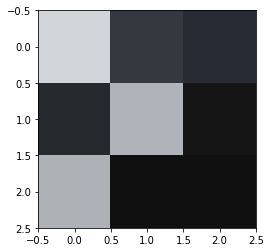

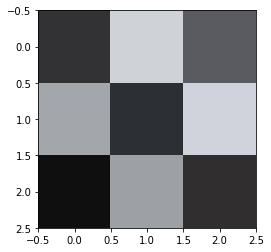

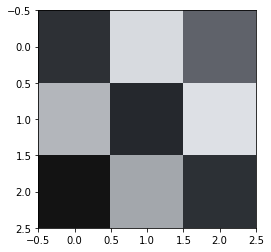

In [3]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import os

#number of pixels after conversion
no_pix = 3
#array for weights fill with zeros
alldata = np.zeros([0,no_pix*no_pix+1])
#all files are in user root directory
directory = '.'
#list files one by one in loop
for filename in os.listdir(directory):
    #if file is jpg picture than open it
    if filename.endswith(".jpg"):
        #original image
        oriimg = cv2.imread(filename)     
        #new resized image
        newimg = cv2.resize(oriimg,(no_pix,no_pix))
        #convert to gray scale
        gray = cv2.cvtColor(newimg, cv2.COLOR_BGR2GRAY)
        #transform image to float array
        data = np.asarray( gray, dtype=np.float)
        #convert array to float numbers between 0 and 1
        data = data / 255
        #show image
        plt.imshow(newimg)
        plt.show()
        data = data.flatten()
        #if file name start with 0 than add 0 to the last column for Logistic Regression
        if filename.startswith("0"):
            data = np.append(data,0)
        #if file name start with 1 than add 1 to the last column for Logistic Regression
        elif filename.startswith("1"):
            data = np.append(data,1)
        alldata=np.vstack([alldata,data])
#save all data to CSV file
np.savetxt("output3.csv",alldata, delimiter=",")
